In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [103]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Male%20and%20female%20Voice%20data%20creat%20by%20al%20arman%20ovi%20.csv'

In [104]:
data = pd.read_csv(path)

In [105]:
data.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male


In [106]:
data['label'] = data['label'].replace(['male', 'female'],[0,1])
data['label'].value_counts()

label
0    3682
1    2311
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

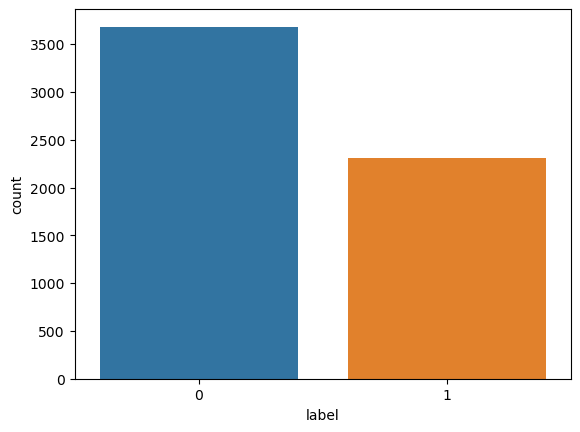

In [107]:
sn.countplot(data,x='label')

In [108]:
data.isnull().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [109]:
data.duplicated().sum()

0

In [110]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [111]:
x = data.drop('label', axis=1)
y = data[['label']]

In [112]:
x.shape

(5993, 21)

In [113]:
y.shape

(5993, 1)

In [114]:
x ,y = random.fit_resample(x,y)

In [115]:
y.value_counts()

label
0        3682
1        3682
Name: count, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=42 , test_size=.30)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()

In [119]:
lr.fit(xtrain , ytrain)

C:\Users\Ovi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [120]:
lr.score(xtrain , ytrain)

0.7473806752037253

In [121]:
lr.score(xtest , ytest)

0.7570135746606335

In [122]:
cm = confusion_matrix(ytest , lr.predict(xtest))
cm

array([[848, 270],
       [267, 825]], dtype=int64)

<Axes: >

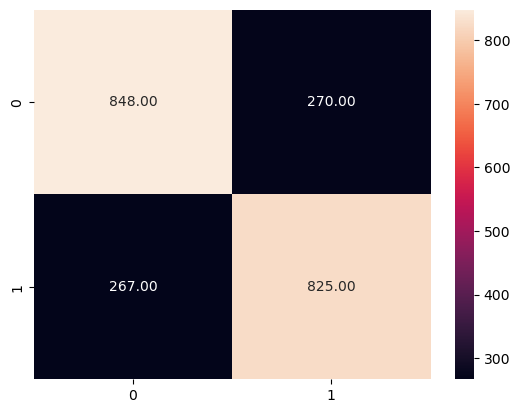

In [133]:
sn.heatmap(cm,annot = True , fmt=".2f")

In [123]:
print(classification_report(ytest,lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1118
           1       0.75      0.76      0.75      1092

    accuracy                           0.76      2210
   macro avg       0.76      0.76      0.76      2210
weighted avg       0.76      0.76      0.76      2210



In [124]:
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [125]:
dtc.score(xtrain , ytrain)

1.0

In [126]:
dtc.score(xtest , ytest)

0.8018099547511313

In [127]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1118
           1       0.78      0.84      0.81      1092

    accuracy                           0.80      2210
   macro avg       0.80      0.80      0.80      2210
weighted avg       0.80      0.80      0.80      2210



In [134]:
cm2 = confusion_matrix(ytest , dtc.predict(xtest))
cm2

array([[855, 263],
       [175, 917]], dtype=int64)

<Axes: >

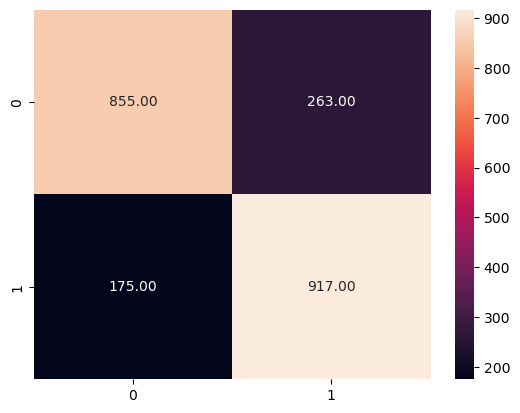

In [135]:
sn.heatmap(cm2,annot = True , fmt=".2f")